Imports

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


Loading the Dataset

In [3]:
wine = load_wine()
X = wine.data
y = wine.target
df = pd.DataFrame(X,columns=wine.feature_names)
df['target'] = y


Initial Inspection

In [4]:
print("Initial few rows of the dataset: ")
print(df.head)

Initial few rows of the dataset: 
<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0       

In [5]:
print("Columns of this dataset: ")
print(df.columns)

Columns of this dataset: 
Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


In [6]:
# Basic Information of the dataset: 
print(df.info)

<bound method DataFrame.info of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  no

Discriptive Analysis

In [7]:
print("Statistical Description of the dataset: ")
print(df.describe(include="all"))

Statistical Description of the dataset: 
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.1

In [8]:
print("Missing Value in the dataset: ")
print(df.isnull().sum())

Missing Value in the dataset: 
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


Exploratory Analysis

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


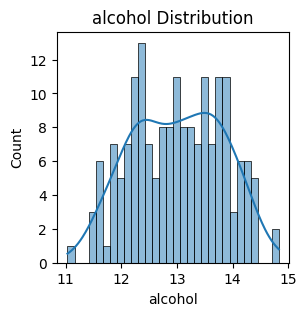

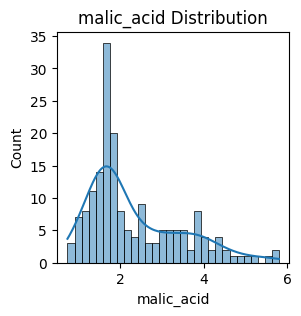

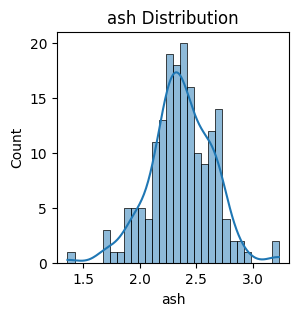

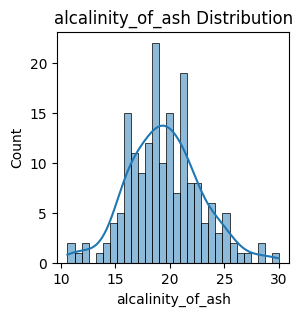

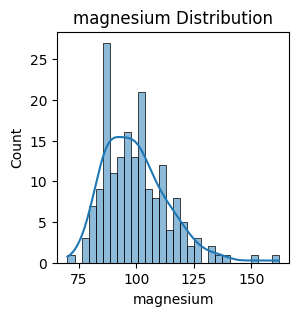

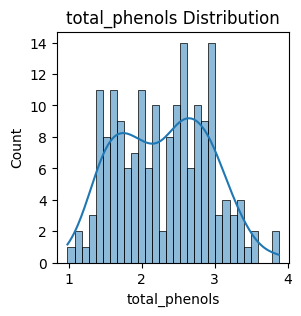

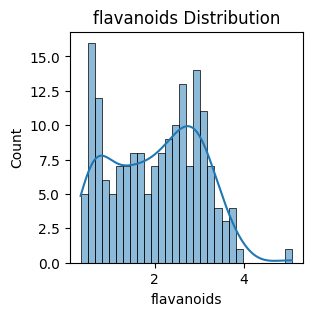

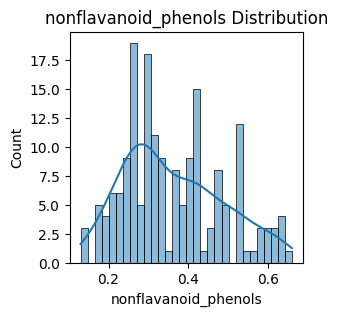

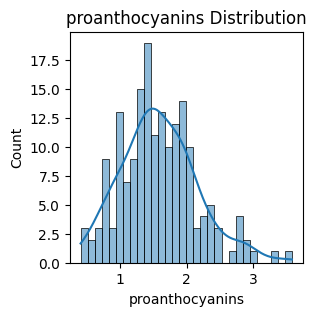

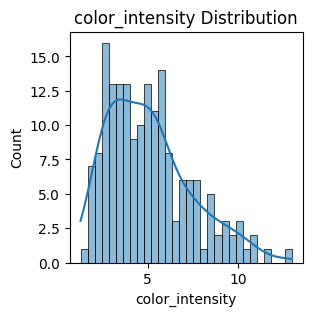

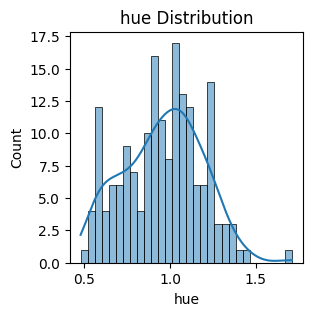

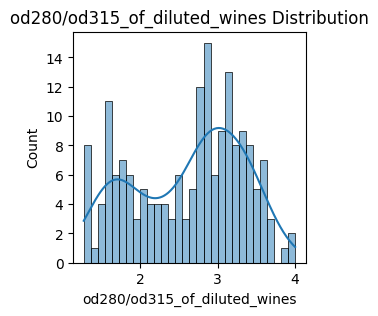

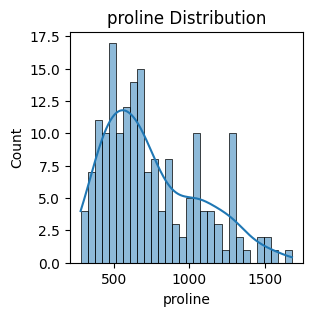

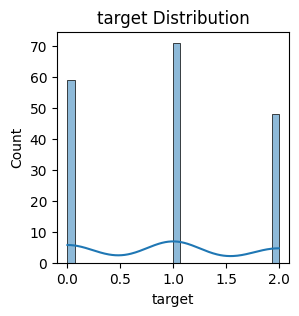

In [9]:
# Histplot
print(df.columns)
for i in df.columns:
    plt.figure(figsize=(3,3))
    sns.histplot(df[i],kde=True,bins=30)
    plt.title(f"{i} Distribution")
    plt.show()


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


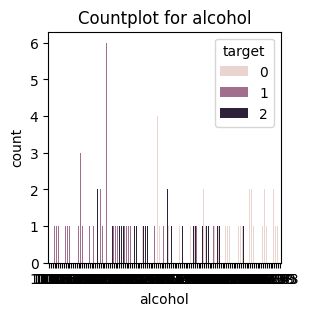

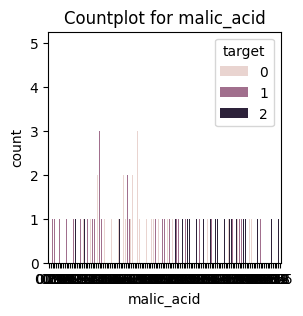

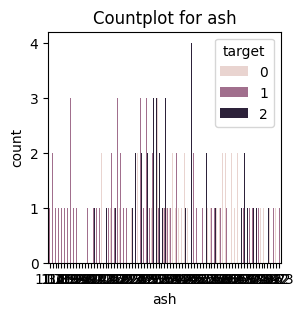

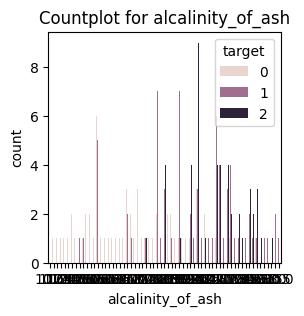

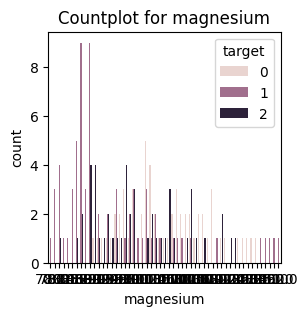

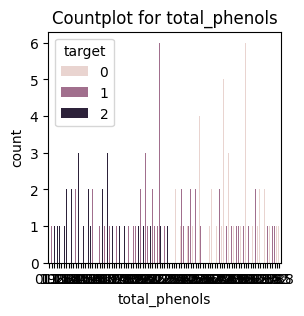

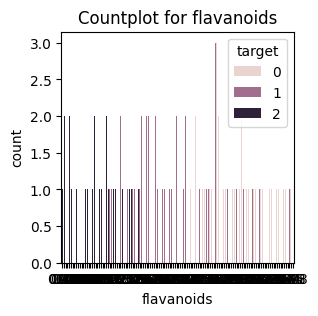

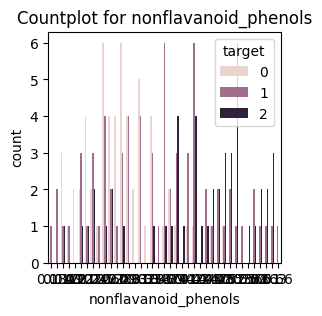

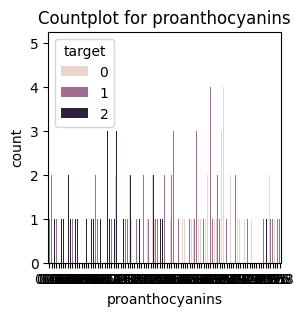

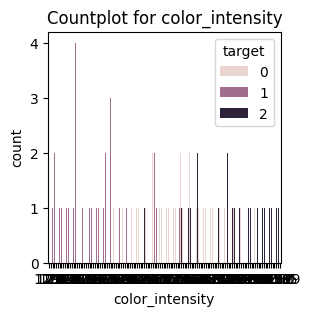

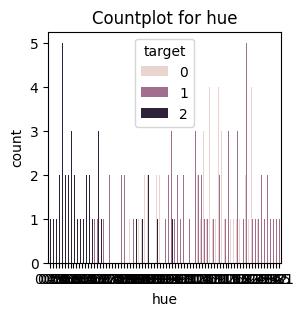

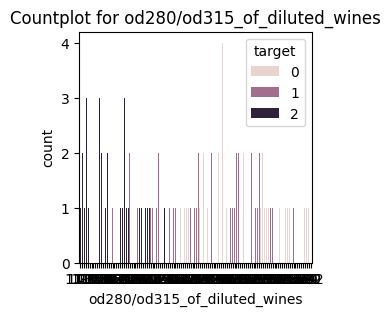

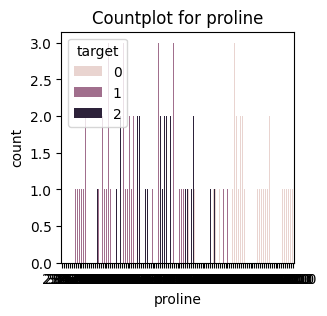

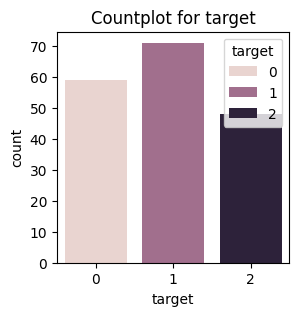

In [10]:
# Count Plot
print(df.columns)
for i in df.columns:
    plt.figure(figsize=(3,3))
    sns.countplot(x = df[i],hue = df['target'],data=df)
    plt.title(f"Countplot for {i}")
    plt.show()


Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')


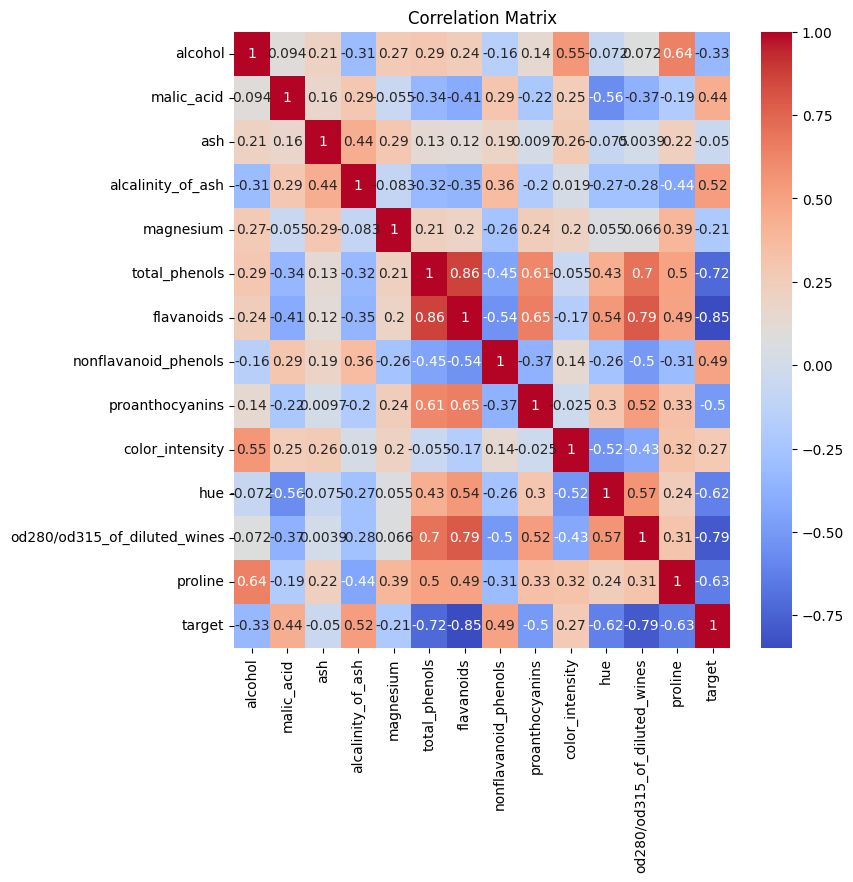

In [15]:
# Heat map
print(df.columns)
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(),cmap='coolwarm',annot=True,)
plt.title("Correlation Matrix")
plt.show()

Inferential Analysis

In [16]:
print(df.columns)
for i in df.columns[0:10]:
    feature = i
    group1 = df[df[feature]>df[feature].median()]['target']
    group2 = df[df[feature]<=df[feature].median()]['target']

    t_stat,p_value = stats.ttest_ind(group1,group2)
    print(f'T stat. value for {i} against target is {t_stat}')
    print(f'P value for {i} against target is {p_value}')

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')
T stat. value for alcohol against target is -4.201688704527219
P value for alcohol against target is 4.205085071129336e-05
T stat. value for malic_acid against target is 5.786560008291606
P value for malic_acid against target is 3.224849828140215e-08
T stat. value for ash against target is -0.9063007856477081
P value for ash against target is 0.3660157653924706
T stat. value for alcalinity_of_ash against target is 7.60462731932966
P value for alcalinity_of_ash against target is 1.6467976130229533e-12
T stat. value for magnesium against target is -3.594529948218771
P value for magnesium against target is 0.00042176459276895906
T stat. value for total_phenols against target is -13.749879438314064
P value for total_phenols 